## Common Statistics on Dataframes
- **df.count()**  Number of non-NA observations
- **df.sum()**    Sum total of values
- **df.mean()**   Average value (calculated as summing all values, then dividing by number of values)
- **df.median()** Center value (calculated by organizing values from smallest to largest, then returning middle of list)
- **df.min()**    Minimum value
- **df.max()**    Maximum value
- **df.std()**    Standard deviation (amount of dispersement of data from mean)
- **df.corr()**   Pairwise correlation of columns (linear relation between two columns of data)

**Notes:**
- To run statistics on all ROWS, include the argument *axis=1*. The argument *axis=0* is set by default to run statistics on columns.
- To INCLUDE missing data, add the argument *skipna=False*. The argument *skipna=True* is set by default. 

In [50]:
print(f"Median for H_MEAN column: {sanitized_df['H_MEAN'].median()}")
print()

# Use df[['COL_NAME_1', ..., 'COL_NAME_LAST']] to define a reduced dataframe of just specific columns
small_df=sanitized_df[['H_MEAN', 'A_MEAN']]  
print(small_df.median())

Median for H_MEAN column: 24.66

H_MEAN       24.66
A_MEAN    52030.00
dtype: float64


### Middle of Data: Mean or Median?

Both Mean and Median describe the "middle" of the data. These values will be different when the data is not skewed. Since **Mean** is more sensitive to outliers, the mean will shift towards outliers. 

In [41]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt # For graphing

def generate_skewed_graph(a):
    mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(skewnorm.ppf(0.01, a),
                    skewnorm.ppf(0.99, a), 100)
    ax.plot(x, skewnorm.pdf(x, a),
           'r-', lw=5, alpha=0.6)

    ax.axvline(x=mean, label='mean', color='purple')
    ax.axvline(x=skewnorm.median(a), label='median')
    plt.legend(loc='best')

    plt.show()

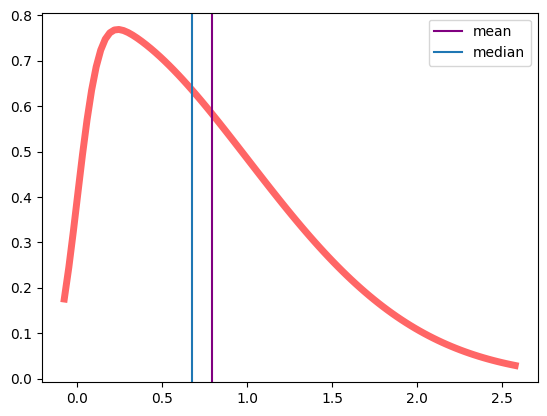

In [57]:
# Change this value to see how the skewed graph's mean and median compare
# Use values between -10 and 10
a = 10
generate_skewed_graph(a)

### Standard Deviation

Standard Deviation refers to how spread out the data is. A large standard deviation (compared to the mean) means data is spread over a wide area while a small standard deviation means data is packed tightly together. Let's visualize these differences with example graphs below. 

*Note these examples below are for Normal Standard Deviation, which is the most common.*

In [42]:
# Libraries to import
import matplotlib.pyplot as plt # For graphing
from scipy.stats import norm # For creating the normal distribution curve
from scipy.integrate import quad # For calculating the area under the curve
import numpy as np

In [43]:
# Since we aren't focused on visualization in this course, 
    # don't worry too much if you don't understand what is
    # going on in this function.
def graph_distribution(mean, stdev, stdev_away):
    domain = np.linspace(-10, 10, 10000)
    norm_range = norm.pdf(domain, mean, stdev)
    comparison_norm_range = norm.pdf(domain, mean, 1)
    
    def normal_distribution_function(x):
        value = norm.pdf(x,mean,stdev)
        return value

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.tight_layout(pad=5.0)
    ax1.plot(domain, norm_range, color='blue', alpha=1.0)
    ax1.fill_between(domain, norm_range, where=(domain<mean+stdev_away*stdev)&(domain>mean-stdev_away*stdev), color='green', alpha=0.2)
    ax1.set_ylim([0, 1])
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability')
    ax1.set_title(f'Standard Deviation of {stdev}', fontsize=10, fontweight="bold")
    
    ax2.plot(domain, comparison_norm_range, color='blue', alpha=1.0)
    ax2.fill_between(domain, comparison_norm_range, where=(domain<mean+stdev_away)&(domain>mean-stdev_away), color='green', alpha=0.2)
    ax2.set_ylim([0, 1])
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Probability')
    ax2.set_title('Standard Deviation of 1', fontsize=10, fontweight="bold")
    
    plt.show()
    
    area, error = quad(normal_distribution_function, mean-stdev_away*stdev, mean+stdev_away*stdev)
    print(f"{round(100*area, 1)}% of data is within {stdev_away} standard deviation(s) of {mean}")

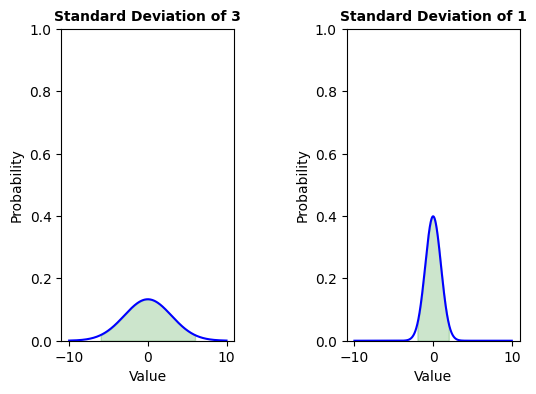

95.4% of data is within 2 standard deviation(s) of 0


In [55]:
mean=0

# Try changing to compare against a standard deviation of 1
stdev=3

# How many standard deviations away do we want to consider?
stdev_away=2

graph_distribution(mean, stdev, stdev_away)